In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data_path = pd.read_csv(r"C:\Users\pavle\OneDrive\Desktop\MNIST from schrach\mnist_train.csv")
test_data_path = pd.read_csv(r"C:\Users\pavle\OneDrive\Desktop\MNIST from schrach\mnist_test.csv")

test_data_path.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_data = train_data_path.to_numpy()
test_data = test_data_path.to_numpy()
np.random.shuffle(train_data) 
np.random.shuffle(test_data) 
test_data.shape

(10000, 785)

In [13]:
m , n = train_data.shape
j , k = test_data.shape

test_data  = test_data.T
X_test = test_data[1:k]
Y_test  = test_data[0]
X_test = X_test / 255

data_train = train_data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

X_train.shape ,Y_train.shape, X_test.shape, Y_test.shape

((784, 60000), (60000,), (784, 10000), (10000,))

In [10]:
def init_params():
    # gaussian distribution
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))

    return W1, b1, W2, b2
def  ReLU(input):
    
    return np.maximum(0, input)

def Softmax(input):

    A = np.exp(input) / (np.sum(np.exp(input), axis = 0))
    return A

def forward_pass(W1, b1, W2, b2, X):

    Z1 = np.dot(W1, X) + b1
    
    A1 = ReLU(Z1)

    Z2 = np.dot(W2,A1) + b2

    A2 = Softmax(Z2)

    return Z1, A1, Z2 , A2 

def one_hot_encode(Y):
     one_hot_Y = np.zeros((Y.size, Y.max() + 1)) 
     one_hot_Y[np.arange(Y.size), Y] = 1  
     one_hot_Y = one_hot_Y.T  
     return one_hot_Y

def  der_ReLU(input):
    return input > 0 

def back_pass(Z1, A1 , Z2, A2, W2,X, Y):
    
    one_hot_Y = one_hot_encode(Y)
    dZ2 = (A2 - one_hot_Y)
    dW2 = 1/m * np.dot(dZ2, A1.T) 
    db2 = 1/m * np.sum(dZ2)       

    dZ1 = np.dot(W2.T,dZ2) * der_ReLU(Z1)
    dW1 = 1/m * np.dot(dZ1,X.T)  
    db1 = 1/m * np.sum(dZ1)
    return dW2, db2, dW1 , db1   

def update_parameters(W1, b1 ,W2, b2 , dW1, db1, dW2, db2, lr):
    W1 = W1 - lr * dW1
    W2 = W2  - lr * dW2
    b1 = b1 - lr * db1
    b2 = b2 - lr * db2
    return W1, b1, W2 , b2 
    

(10, 784) w1
(784, 59000)x 
(10, 59000) a1
(10, 10) w2
(10, 59000) a2 
(10, 784)
(784, 59000)
(10, 59000)
(10, 10)

In [14]:

def preds(A2):
    return np.argmax(A2, 0)

def accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size


def gradiinet_descent(X, Y,  epochs, lr):

    W1 , b1, W2 , b2  = init_params()

    for i in range(epochs):
        Z1, A1 ,Z2, A2 = forward_pass(W1, b1, W2, b2, X)
        dW2 , db2, dW1, db1 = back_pass(Z1, A1, Z2, A2 , W2 , X, Y)
        W1, b1, W2, b2  = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2 , lr)


        if i % 50 == 0 :
            print(f"  iteratiron  = {i}")
            predictions = preds(A2)
            print('acc is = %0.2f ' %accuracy(predictions, Y))

    return W1, b1, W2, b2 

epochs = 401
print("TRAINING")
W1, b1 , W2 , b2 = gradiinet_descent(X_train, Y_train, epochs, 0.1)


TRAINING
  iteratiron  = 0
acc is = 0.04 
  iteratiron  = 50
acc is = 0.55 
  iteratiron  = 100
acc is = 0.78 
  iteratiron  = 150
acc is = 0.84 
  iteratiron  = 200
acc is = 0.86 
  iteratiron  = 250
acc is = 0.87 
  iteratiron  = 300
acc is = 0.88 
  iteratiron  = 350
acc is = 0.89 
  iteratiron  = 400
acc is = 0.89 


In [16]:
print("TESTING")
W1, b1 , W2 , b2 = gradiinet_descent(X_test, Y_test, 501, 0.1)

TESTING
  iteratiron  = 0
acc is = 0.12 
  iteratiron  = 50
acc is = 0.32 
  iteratiron  = 100
acc is = 0.48 
  iteratiron  = 150
acc is = 0.57 
  iteratiron  = 200
acc is = 0.69 
  iteratiron  = 250
acc is = 0.75 
  iteratiron  = 300
acc is = 0.78 
  iteratiron  = 350
acc is = 0.80 
  iteratiron  = 400
acc is = 0.81 
  iteratiron  = 450
acc is = 0.82 
  iteratiron  = 500
acc is = 0.83 


 prdicted label : [2]
true label : 2


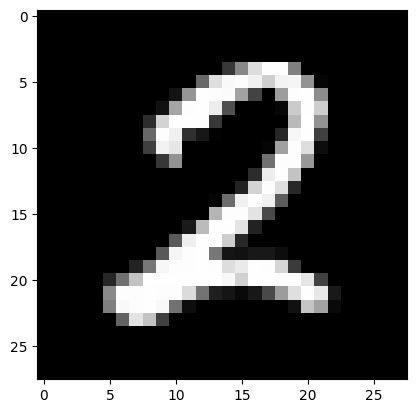

In [ ]:
def prediction(W1, b1, W2, b2, X):

    Z1, A1, Z2 ,A2 = forward_pass(W1, b1, W2, b2, X)
    prediction = preds(A2)
    return prediction

def show_image(index,W1, b1, W2, b2):
    sample = X_test[:, index]

    label = Y_test[index]
    pred = prediction(W1, b1, W2, b2, X_test[:, index, None])

    print(f" prdicted label : {pred}")
    print(f"true label : {label}")
    image = sample.reshape((28,28))
    plt.imshow(image, cmap = "gray")


show_image(55, W1, b1, W2, b2)
    